# This Assignment is done by N M Emran Hussain, GWID: 24414095

## Reading Bikeshare data of 2024 February, March and April

In [1]:
import pandas as pd
# Read csv files

df_Feb = pd.read_csv('202402-capitalbikeshare-tripdata.csv')
df_Mar = pd.read_csv('202403-capitalbikeshare-tripdata.csv')
df_Apr = pd.read_csv('202404-capitalbikeshare-tripdata.csv')

# concat data
df=pd.concat([df_Feb, df_Mar,df_Apr])

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,24DBACC298E33BF6,electric_bike,2024-02-01 21:18:50,2024-02-01 21:27:36,Eckington Pl & Q St NE,31505.0,5th & K St NW,31600.0,38.910893,-77.005023,38.90304,-77.019027,member
1,FE1067800A18BC56,electric_bike,2024-02-06 17:15:33,2024-02-06 17:30:33,4th & C St SW,31243.0,NaN,NaN,38.886443,-77.017388,38.91000,-76.980000,member
2,AD1962B215B5879D,electric_bike,2024-02-26 13:19:42,2024-02-26 13:30:44,North Capitol St & F St NW,31624.0,NaN,NaN,38.896907,-77.009684,38.90000,-77.010000,member
3,3F8352E6D9EC4F85,electric_bike,2024-02-02 11:01:22,2024-02-02 11:05:14,1st & K St NE,31662.0,NaN,NaN,38.902394,-77.005614,38.90000,-77.010000,member
4,D656DA87FA915F14,electric_bike,2024-02-25 08:28:18,2024-02-25 08:48:44,Virginia Ave & 25th St NW,31297.0,NaN,NaN,38.898456,-77.053075,38.91000,-77.060000,member


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1245899 entries, 0 to 490264
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             1245899 non-null  object 
 1   rideable_type       1245899 non-null  object 
 2   started_at          1245899 non-null  object 
 3   ended_at            1245899 non-null  object 
 4   start_station_name  1061748 non-null  object 
 5   start_station_id    1061748 non-null  float64
 6   end_station_name    1052421 non-null  object 
 7   end_station_id      1052253 non-null  float64
 8   start_lat           1245899 non-null  float64
 9   start_lng           1245899 non-null  float64
 10  end_lat             1244884 non-null  float64
 11  end_lng             1244884 non-null  float64
 12  member_casual       1245899 non-null  object 
dtypes: float64(6), object(7)
memory usage: 133.1+ MB


## Bike Availibility: Number of Pick-ups

In [3]:
# Convert the 'started_at' column to datetime objects
df['started_at_date'] = pd.to_datetime(df['started_at']).dt.date

# Filter for trips started at '22nd & H St NW'
PU_trips = df[df['start_station_name'] == '22nd & H St NW']

# Group by date and count the trips
PU_counts = PU_trips.groupby('started_at_date')['started_at_date'].count()

PU_counts

started_at_date
2024-02-01    33
2024-02-02    23
2024-02-03    22
2024-02-04    18
2024-02-05    19
              ..
2024-04-26    33
2024-04-27    18
2024-04-28    36
2024-04-29    37
2024-04-30    40
Name: started_at_date, Length: 90, dtype: int64

## Dock Availibility: Number of Drop-offs

In [4]:
# Convert the 'ended_at' column to datetime objects
df['ended_at_date'] = pd.to_datetime(df['ended_at']).dt.date

# Filter for trips ended at '22nd & H St NW'
DO_trips = df[df['end_station_name'] == '22nd & H St NW']

# Group by date and count the trips
DO_counts = DO_trips.groupby('ended_at_date')['ended_at_date'].count()

DO_counts

ended_at_date
2024-02-01    33
2024-02-02    25
2024-02-03    20
2024-02-04    19
2024-02-05    23
              ..
2024-04-26    39
2024-04-27    24
2024-04-28    28
2024-04-29    38
2024-04-30    39
Name: ended_at_date, Length: 90, dtype: int64

## Merging the tables of Bike and Dock availibility

In [5]:
# merge PU_counts and DO_counts by matching the dates, and change the column names to PU_count and DO_count respectively.

PU_DO_counts = pd.merge(PU_counts, DO_counts, left_index=True, right_index=True, how='outer')
PU_DO_counts = PU_DO_counts.rename(columns={'started_at_date': 'PU_ct', 'ended_at_date': 'DO_ct'})

# change the index name from 'started_at' to 'date'

PU_DO_counts = PU_DO_counts.rename_axis('date')
PU_DO_counts

,PU_ct,DO_ct
date,,
2024-02-01,33,33
2024-02-02,23,25
2024-02-03,22,20
2024-02-04,18,19
2024-02-05,19,23
...,...,...
2024-04-26,33,39
2024-04-27,18,24
2024-04-28,36,28


## Visualize pickups and dropoffs

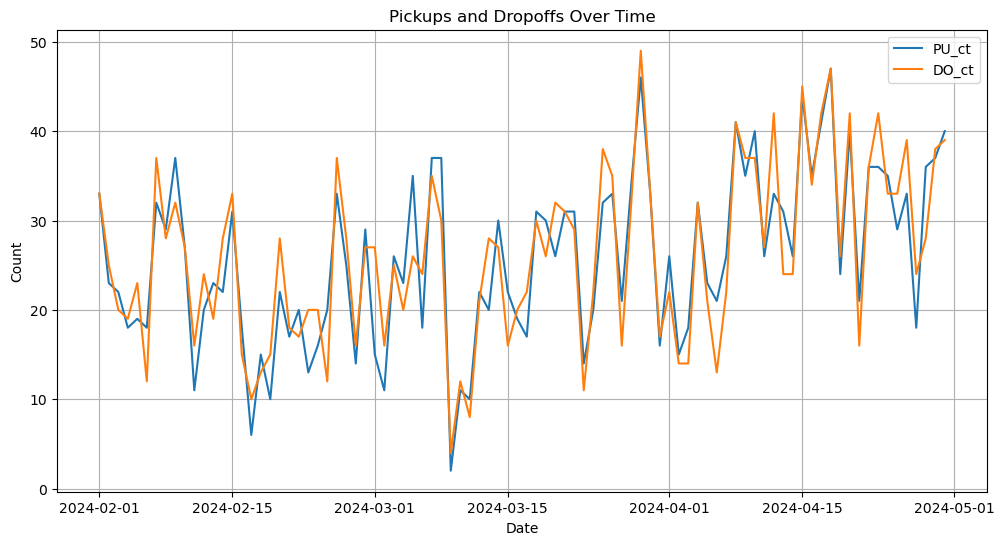

In [6]:
# plot line chart showing the PU_count and DO_count over time
import matplotlib.pyplot as plt

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(PU_DO_counts.index, PU_DO_counts['PU_ct'], label='PU_ct')
plt.plot(PU_DO_counts.index, PU_DO_counts['DO_ct'], label='DO_ct')

# Customize the chart
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Pickups and Dropoffs Over Time')
plt.legend()
plt.grid(True)

plt.show()

## Reading the file of DC Weather data


In [7]:
df_weather = pd.read_csv('DC_weather_2024.csv')
df_weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"washington, dc",2024-01-01,43.0,38.9,40.8,41.8,31.4,36.4,33.3,74.7,...,0.9,1,10,2024-01-01T07:26:50,2024-01-01T16:56:30,0.68,Overcast,Cloudy skies throughout the day.,cloudy,"KDCA,72405013743,D6279,72403793728,KADW,KDAA,7..."
1,"washington, dc",2024-01-02,45.9,35.7,40.4,40.9,27.2,33.8,26.2,57.3,...,8.3,5,10,2024-01-02T07:26:58,2024-01-02T16:57:20,0.72,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,D6279,72403793728,KADW,KDAA,7..."
2,"washington, dc",2024-01-03,47.8,33.7,39.9,44.6,27.8,36.4,26.6,59.5,...,9.6,5,10,2024-01-03T07:27:04,2024-01-03T16:58:10,0.75,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,D6279,72403793728,KADW,..."
3,"washington, dc",2024-01-04,46.7,33.2,40.4,41.9,24.1,34.6,25.2,55.2,...,4.8,4,10,2024-01-04T07:27:07,2024-01-04T16:59:02,0.78,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,72403793728,KADW,KDAA,7..."
4,"washington, dc",2024-01-05,39.9,27.8,33.6,35.8,19.4,28.0,18.9,55.0,...,11.6,5,10,2024-01-05T07:27:09,2024-01-05T16:59:55,0.81,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,72403793728,D6279,KADW,..."


In [8]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              366 non-null    object 
 1   datetime          366 non-null    object 
 2   tempmax           366 non-null    float64
 3   tempmin           366 non-null    float64
 4   temp              366 non-null    float64
 5   feelslikemax      366 non-null    float64
 6   feelslikemin      366 non-null    float64
 7   feelslike         366 non-null    float64
 8   dew               366 non-null    float64
 9   humidity          366 non-null    float64
 10  precip            366 non-null    float64
 11  precipprob        366 non-null    int64  
 12  precipcover       366 non-null    float64
 13  preciptype        134 non-null    object 
 14  snow              366 non-null    float64
 15  snowdepth         366 non-null    float64
 16  windgust          366 non-null    float64
 1

## Dropping uncessary variables

In [9]:
# Drop unnecessary variables
df_weather=df_weather.drop(columns=['name', 'stations','description','sunrise','sunset','conditions','severerisk','preciptype','windgust'])
df_weather.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon
0,2024-01-01,43.0,38.9,40.8,41.8,31.4,36.4,33.3,74.7,0.0,...,13.6,327.2,1017.6,90.3,9.9,11.7,0.9,1,0.68,cloudy
1,2024-01-02,45.9,35.7,40.4,40.9,27.2,33.8,26.2,57.3,0.0,...,18.1,327.7,1020.6,47.5,9.9,96.5,8.3,5,0.72,partly-cloudy-day
2,2024-01-03,47.8,33.7,39.9,44.6,27.8,36.4,26.6,59.5,0.0,...,8.8,210.9,1018.1,68.7,9.9,113.2,9.6,5,0.75,partly-cloudy-day
3,2024-01-04,46.7,33.2,40.4,41.9,24.1,34.6,25.2,55.2,0.0,...,21.8,329.2,1018.9,68.5,9.9,54.2,4.8,4,0.78,partly-cloudy-day
4,2024-01-05,39.9,27.8,33.6,35.8,19.4,28.0,18.9,55.0,0.0,...,13.2,303.8,1026.9,44.5,9.9,132.6,11.6,5,0.81,partly-cloudy-day


## Preparing X and y: Merge df_weather with PU_DO_counts

In [10]:
# Convert the 'datetime' column to datetime objects and extract the date
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])
df_weather['date'] = df_weather['datetime'].dt.date

# Merge the two dataframes based on the 'date' column
merged_df = pd.merge(PU_DO_counts, df_weather, on='date', how='left')

# Display the merged dataframe
merged_df

,date,PU_ct,DO_ct,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon
0,2024-02-01,33,33,2024-02-01,53.0,31.7,42.4,53.0,26.4,39.3,...,12.0,190.8,1016.3,43.3,8.4,136.8,11.8,5,0.73,partly-cloudy-day
1,2024-02-02,23,25,2024-02-02,51.8,44.0,47.1,51.8,36.6,44.4,...,19.1,354.3,1012.8,97.3,9.8,51.7,4.4,2,0.75,rain
2,2024-02-03,22,20,2024-02-03,51.0,35.8,42.2,51.0,28.0,37.6,...,14.7,354.9,1018.2,11.0,9.9,143.9,12.5,6,0.79,clear-day
3,2024-02-04,18,19,2024-02-04,51.2,32.7,41.7,51.2,27.4,40.7,...,9.2,87.4,1016.0,9.0,9.9,147.4,12.8,6,0.83,clear-day
4,2024-02-05,19,23,2024-02-05,51.8,32.5,41.0,51.8,26.0,37.8,...,12.2,34.9,1013.8,21.4,9.9,145.3,12.7,6,0.86,partly-cloudy-day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2024-04-26,33,39,2024-04-26,64.9,45.5,55.2,64.9,41.5,54.2,...,15.4,116.4,1029.5,69.1,9.9,215.0,18.5,9,0.59,partly-cloudy-day
86,2024-04-27,18,24,2024-04-27,60.1,51.9,55.7,60.1,51.9,55.7,...,10.0,149.9,1030.1,97.3,9.7,44.0,3.9,2,0.63,rain
87,2024-04-28,36,28,2024-04-28,83.1,55.8,67.0,83.3,55.8,67.1,...,10.0,170.0,1021.3,62.1,9.8,213.6,18.5,9,0.67,partly-cloudy-day
88,2024-04-29,37,38,2024-04-29,88.3,62.7,75.2,88.9,62.7,75.3,...,13.0,177.3,1015.6,35.8,9.9,204.5,17.8,9,0.70,partly-cloudy-day


## Visualizing pickups and dropoffs

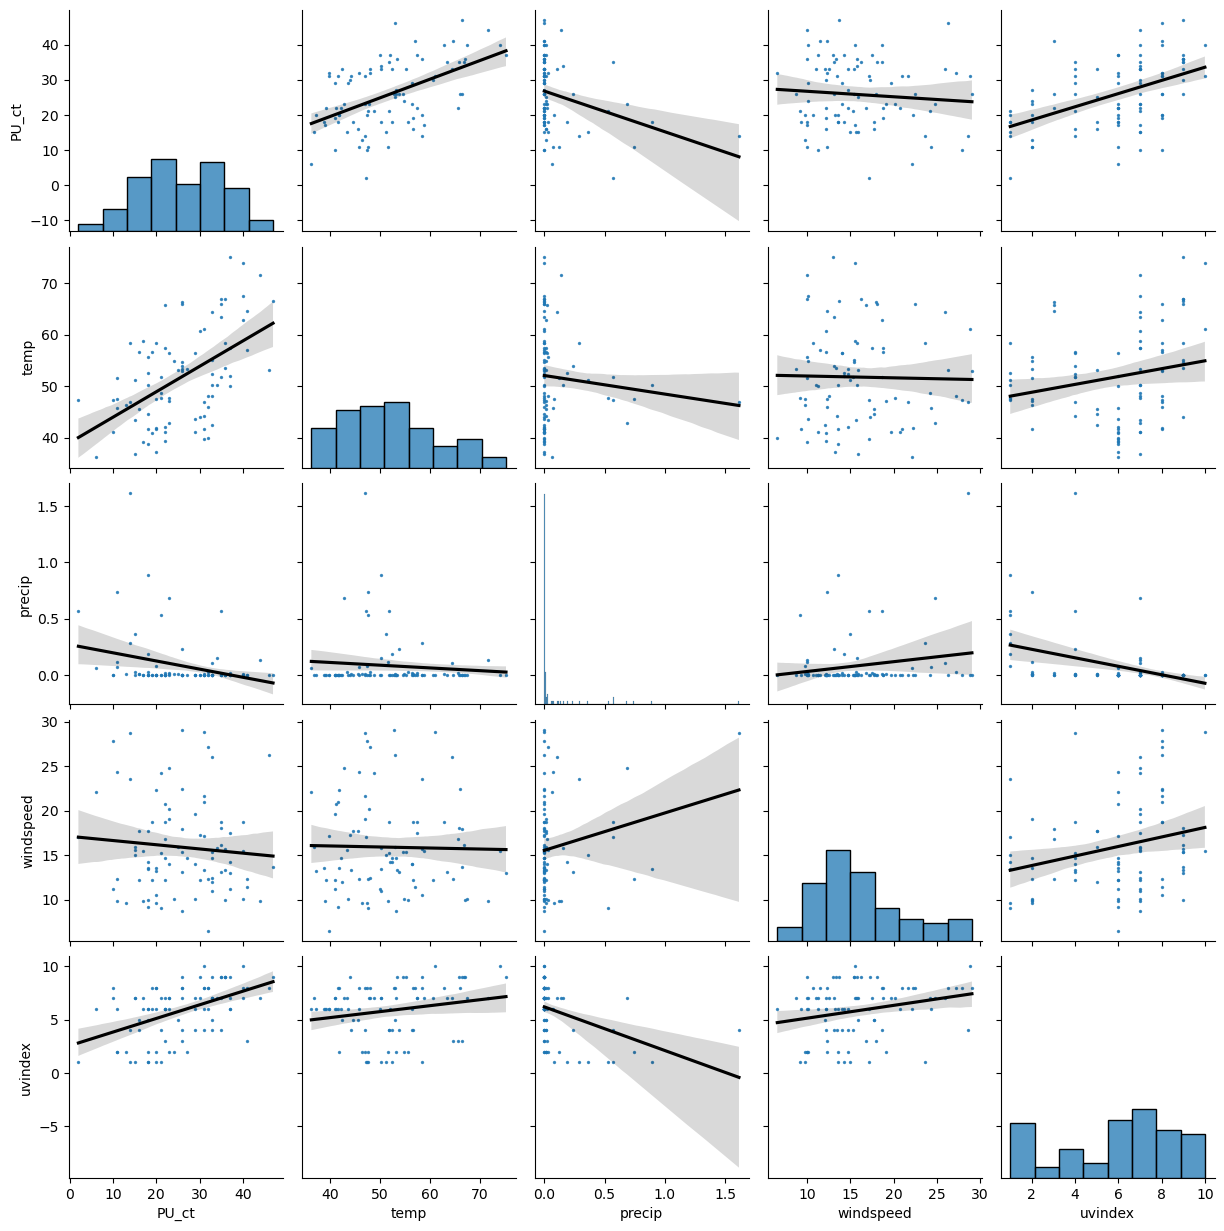

In [11]:
import seaborn as sns
sns.pairplot(merged_df[['PU_ct',"temp", "precip", "windspeed","uvindex"]], kind="reg",plot_kws=dict(scatter_kws=dict(s=2), line_kws = {'color':'black'}))

## Prepare training and test data

In [12]:
# we have two target variables: PU_ct and DO_ct and five indpendent catagorical variables
y = merged_df[['PU_ct','DO_ct']]
X = merged_df[['temp','precip','windspeed','uvindex','icon']]
X

,temp,precip,windspeed,uvindex,icon
0,42.4,0.000,12.0,5,partly-cloudy-day
1,47.1,0.012,19.1,2,rain
2,42.2,0.000,14.7,6,clear-day
3,41.7,0.000,9.2,6,clear-day
4,41.0,0.000,12.2,6,partly-cloudy-day
...,...,...,...,...,...
85,55.2,0.000,15.4,9,partly-cloudy-day
86,55.7,0.032,10.0,2,rain
87,67.0,0.000,10.0,9,partly-cloudy-day
88,75.2,0.000,13.0,9,partly-cloudy-day


## Train_test_split with y=['PU_ct','DO_ct'].

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 200) # 40% test data

# **Assignment 2: Classification Models**

### Our intuition is to allocate more bikes if PU_ct > DO_ct; and less bikes if PU_ct < DO_ct. Thus, in this assignment, we want to predict whether PU_ct > DO_ct. We first create a new target variable to indicate whether PU_ct > DO_ct.

### Create categorical target variable

In this snippet of code, new variables called PU_gt_DO are being created in both the y_train and y_test datasets. These variables are binary (True/False) indicators that compare the values in two other variables, PU_ct and DO_ct, within each dataset. Specifically, 'PU_gt_DO' is set to True if the value of PU_ct (which stand for "Pick Up count") is greater than the value of DO_ct ("Drop Off count"). Otherwise, it's set to False. This kind of variable can be useful in situations where the relative magnitude of these counts is important, such as analyzing traffic flow or customer behavior in different locations.

In [14]:
# create a new variable to indicate if PU_ct > DO_ct in y_train and y_test
y_train['PU_gt_DO'] = y_train['PU_ct'] > y_train['DO_ct']
y_test['PU_gt_DO'] = y_test['PU_ct'] > y_test['DO_ct']

### Dummy encoding of categorical feature 'icon' before training

In the provided code, categorical variable encoding and alignment of features between training and testing datasets are being handled. Initially, the pd.get_dummies() function is used to convert the categorical variable icon into multiple binary (dummy) variables in both the X_train and X_test datasets. The drop_first=True option removes the first dummy column to avoid multicollinearity, a common practice in statistical modeling. This results in a set of new columns prefixed with icon, each representing a category of the original icon variable, except the first category.

After transforming the categorical data, the code ensures that the training and testing sets have the same columns. This is done by reindexing X_test to match the columns of X_train, using the 'reindex()' method. Columns missing in X_test that are present in X_train are added with a fill value of 0. This step is crucial because machine learning models require the same features in both training and testing datasets to make consistent predictions.

In [15]:
# get dummies in X_train_PU
X_train = pd.get_dummies(X_train, columns=['icon'], prefix='icon',drop_first=True)

# get dummies in X_test_PU
X_test = pd.get_dummies(X_test, columns=['icon'], prefix='icon',drop_first=True)

# Ensure both training and testing sets have the same columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [16]:
X_train.head()

,temp,precip,windspeed,uvindex,icon_partly-cloudy-day,icon_rain,icon_snow
73,66.0,0.000,22.5,8,True,False,False
60,53.9,0.235,13.1,4,False,True,False
18,41.1,0.000,11.2,7,False,False,False
44,56.6,0.000,18.8,8,True,False,False
4,41.0,0.000,12.2,6,True,False,False


### Applying standardization to prevent feature scale issue

The code snippet demonstrates the use of the StandardScaler from sklearn.preprocessing to standardize the training and testing datasets by scaling features to have zero mean and unit variance. It starts by initializing the scaler and applying it to the training data to both fit the scaler (calculate the mean and standard deviation) and transform the data. This scaled version of the training data is then stored back into a DataFrame with the original indexing and column names preserved. For the testing data, the scaler is used only to transform the data, using the statistics obtained from the training data. This step ensures that the model evaluation remains valid and unbiased, as it prevents data leakage by not allowing the model to have prior knowledge of the testing data’s distribution.

In [28]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()
X_train = pd.DataFrame (scaler.fit_transform(X_train), index = X_train.index, columns = X_train.columns)

# Use transform only to avoid data lekage
X_test = pd.DataFrame (scaler.transform(X_test), index = X_test.index, columns = X_test.columns)

### Task 1: Train a KNN classifier model with  k=5 , and report the training and test accuracy, respectively.

This code snippet outlines the process of applying a K-Nearest Neighbors (KNN) classifier to a dataset for 'binary classification'. It starts by importing the necessary classes from sklearn for the KNN model and to compute 'accuracy'. The KNN classifier is initialized with k=5, indicating that the model will consider the <font color="blue"> five nearest neighbors </font> to make predictions.

The feature sets (X_train and X_test) and the target variable (PU_gt_DO) are specified. There's a check to ensure that PU_gt_DO exists in y_train and y_test. If y_train is a DataFrame and contains the column PU_gt_DO, that column is selected as the target for both training and testing. If y_train is a Series, it’s assumed that the Series itself is the target variable. If the target variable doesn't exist, an error message is displayed, and a KeyError is raised.

The KNN model is trained using the training data, and predictions are made on both the training and testing datasets. The accuracy of the model is calculated separately for training and testing data to evaluate the model's performance. The accuracies are then printed out, giving insight into how well the model fits the training data and generalizes to unseen data.

In [20]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define KNN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Select features and target variable
X_train_knn = X_train
X_test_knn = X_test

# Verify if 'PU_gt_DO' exists in y_train and y_test
if isinstance(y_train, pd.DataFrame) and 'PU_gt_DO' in y_train.columns:
    y_train_knn = y_train['PU_gt_DO']
    y_test_knn = y_test['PU_gt_DO']
elif isinstance(y_train, pd.Series):
    y_train_knn = y_train
    y_test_knn = y_test
else:
    print("Column 'PU_gt_DO' not found in y_train/y_test. Available columns:", y_train.columns)
    raise KeyError("Ensure the target column 'PU_gt_DO' exists in your dataset.")

# Train the model
knn.fit(X_train_knn, y_train_knn)

# Predict on training and testing sets
y_train_pred = knn.predict(X_train_knn)
y_test_pred = knn.predict(X_test_knn)

# Calculate accuracy
train_accuracy = accuracy_score(y_train_knn, y_train_pred)
test_accuracy = accuracy_score(y_test_knn, y_test_pred)

# Display accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.7593
Testing Accuracy: 0.4444


### Task 2: With the same training data, plot the training and test accuracy of the KNN model against  k  from 1 to 15.

This code snippet is designed to evaluate <font color="blue"> how the choice of k, the number of neighbors, affects the accuracy of a K-Nearest Neighbors (KNN) classifier </font> on both training and testing data. It begins by initializing empty lists to store the accuracy scores for different values of k from 1 to 15. For each value of k, it sets up a KNN classifier, trains it using the training dataset (X_train_knn, y_train_knn), and then makes predictions on both the training and testing datasets.

The accuracies of these predictions are calculated and stored in the previously initialized lists (train_accuracies and test_accuracies). After computing the accuracies for all specified values of k, the code plots these accuracies using matplotlib.pyplot. The plot features the training accuracies and testing accuracies as functions of k, showing how the accuracy changes with different numbers of neighbors. This visualization helps in understanding the trade-off between overfitting and underfitting as k varies, aiding in the selection of an optimal k value for the classifier. The plot is labeled appropriately with axes titles, a chart title, and a legend to distinguish between training and testing accuracies.

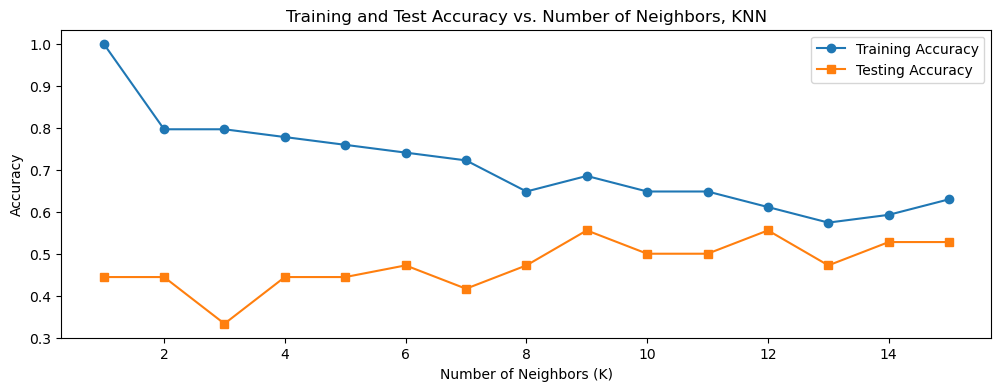

In [21]:
# Lists to store accuracy scores
train_accuracies = []
test_accuracies = []

k_values = range(1, 16)
# Loop over k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_knn, y_train_knn)
    y_train_pred = knn.predict(X_train_knn)
    y_test_pred = knn.predict(X_test_knn)

    # Compute accuracies
    train_accuracies.append(accuracy_score(y_train_knn, y_train_pred))
    test_accuracies.append(accuracy_score(y_test_knn, y_test_pred))

# Plotting train and test accuracy
plt.figure(figsize=(12, 4))
plt.plot(k_values, train_accuracies, marker='o', label="Training Accuracy")
plt.plot(k_values, test_accuracies, marker='s', label="Testing Accuracy")

# Adding labels and title
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy vs. Number of Neighbors, KNN')

# Adding legend
plt.legend()

# Display the plot
plt.show()

### Task 3: Identify the optimal k in the above plot and report the corresponding test accuracy.

This Python code snippet <font color="blue"> evaluates the performance of models, specifically determining the optimal K value for a K-Nearest Neighbors algorithm </font> based on <font color="blue"> test accuracy </font>. It starts by converting a list of test accuracies into a NumPy array for efficient computation. Using NumPy's <font color="blue"> np.argmax() </font>, it identifies the index of the <font color="blue"> highest test accuracy </font> within this array, which indicates the most effective model. The optimal K value is then extracted from a corresponding list of K values based on this index. Finally, the script outputs the optimal K value along with its corresponding test accuracy, formatted to two decimal places, providing a clear indication of the model's performance at this specific parameter setting.

In [22]:
import numpy as np

# Convert test accuracies list to a NumPy array
test_accuracies = np.array(test_accuracies)

# Find the index of the maximum test accuracy
optimal_k_index = np.argmax(test_accuracies)

# Retrieve the optimal K value (from k_values) and its corresponding test accuracy
optimal_k = k_values[optimal_k_index]
optimal_test_accuracy = test_accuracies[optimal_k_index]

print(f"Optimal K: {optimal_k}")
print(f"Corresponding Test Accuracy: {optimal_test_accuracy:.4f}")

Optimal K: 9
Corresponding Test Accuracy: 0.5556


##### While the code snippet efficiently identifies the optimal K value from a set of precomputed accuracies, GridSearchCV would be a more robust choice for comprehensively searching and validating parameter settings in a systematic, automated manner. The use of GridSearchCV is generally preferred for scenarios where thorough tuning and validation are critical for the model's performance and reliability.

The following Python code provided uses <font color="blue"> GridSearchCV </font> from the sklearn library to optimize the <font color="blue"> hyperparameters </font> of a K-Nearest Neighbors (KNN) classifier. It sets up a parameter grid to test different numbers of neighbors (from 1 to 15) and initializes a KNN model. <font color="blue"> GridSearchCV </font> performs an exhaustive search with <font color="blue"> 5-fold </font> cross-validation over the defined parameter grid, evaluating model performance based on accuracy. After fitting the model to the <font color="blue"> training data </font>, it identifies and prints the <font color="blue"> optimal number of neighbors </font> and the <font color="blue"> highest accuracy </font> achieved. The best model is then <font color="blue"> evaluated on the test data </font> to check its performance, providing a practical approach to tuning parameters for best performance, thus ensuring the model is neither overfitting nor underfitting.

In [23]:
import numpy as np
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid by the hyperparameter name
param_grid = {'n_neighbors': np.arange(15)+1}

# Create the KNN model
knn = neighbors.KNeighborsClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_knn, y_train_knn)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_score = best_model.score(X_test_knn, y_test_knn)
print("Test accuracy:", test_score)

Best hyperparameters: {'n_neighbors': 8}
Best accuracy: 0.5781818181818181
Test accuracy: 0.4722222222222222


### Task 4: Train a Logistic Regression classifier model, and report the training and test accuracy, respectively.

In this code, a Logistic Regression model is set up and evaluated. First, the model is defined using LogisticRegression from sklearn, with max_iter=1000 to allow up to 1000 iterations for the model to converge, solver='lbfgs' as the optimization algorithm, and random_state=42 to ensure reproducibility of results. The model is then trained on the X_train_knn and y_train_knn datasets.

Predictions are made on both the training (X_train_knn) and testing datasets (X_test_knn) using the trained model. The accuracy of these predictions is calculated using <font color="blue"> accuracy_score from sklearn.metrics, providing a measure of how well the model performs </font> on both datasets.

Furthermore, the model's coefficients and intercept are printed. The intercept represents the <font color="blue"> bias term </font> in the logistic model, and the coefficients indicate <font color="blue"> the influence of each feature on the target variable </font>. These coefficients are presented as a pandas Series, with the index set to the column names of X_train_knn for better readability.

Finally, the training and testing accuracies of the logistic regression model are displayed, providing <font color="blue"> insights into the model's performance </font> and its ability to generalize to new, unseen data. This step is crucial for evaluating the effectiveness of the logistic regression model in classifying the given dataset.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# Define and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
logreg.fit(X_train_knn, y_train_knn)

# Predict on training and testing sets
y_train_pred_logreg = logreg.predict(X_train_knn)
y_test_pred_logreg = logreg.predict(X_test_knn)

# Compute accuracy
train_accuracy_logreg = accuracy_score(y_train_knn, y_train_pred_logreg)
test_accuracy_logreg = accuracy_score(y_test_knn, y_test_pred_logreg)

# Report the coefficients and intercept using the correct model variable
print("Intercept:", logreg.intercept_)  # Changed 'model' to 'logreg'
print("Coefficients:\n", pd.Series(logreg.coef_.flatten(), index=X_train_knn.columns))  # Fixed variable name

# Print the accuracy results
print(f"Logistic Regression Training Accuracy: {train_accuracy_logreg:.4f}")
print(f"Logistic Regression Testing Accuracy: {test_accuracy_logreg:.4f}")


Intercept: [-0.22399632]
Coefficients:
 temp                     -0.081528
precip                    1.351205
windspeed                -0.040697
uvindex                   0.252599
icon_partly-cloudy-day    0.779979
icon_rain                 0.543769
icon_snow                -0.247574
dtype: float64
Logistic Regression Training Accuracy: 0.7222
Logistic Regression Testing Accuracy: 0.5278


### Task 5: Calculate the probability that PU_ct > DO_ct in the first test sample. 

This code snippet demonstrates how to use a logistic regression model to predict the probability of an event for a specific sample from the testing set. The logistic regression model, named <font color="blue"> log_reg </font>, is first defined and trained on the training set (X_train_knn, y_train_knn) if not previously trained.

The key operation in this snippet involves making <font color="blue"> probability predictions </font> for the first sample in the <font color="blue">  testing set </font> (X_test_knn). The sample is extracted and reshaped into the correct format for the <font color="blue"> predict_proba method </font> of the logistic regression model. This method returns the probabilities that the sample belongs to each class (0 and 1, with 1 presumably indicating that PU_ct > DO_ct).

The specific probability of interest, the probability that the condition PU_ct > DO_ct holds true for this first test sample, is then extracted from the output array. This value, representing class 1, is formatted and printed to show the likelihood as a decimal.

Essentially, this script showcases how to predict and interpret probabilistic outcomes for individual predictions using a logistic regression model in a practical scenario.

In [25]:
# Ensure the logistic regression model is defined and trained
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()  # If not already trained
log_reg.fit(X_train_knn, y_train_knn)  

# Predict probabilities for the first test sample
first_sample = X_test_knn.iloc[0].values.reshape(1, -1)  
probabilities = log_reg.predict_proba(first_sample)  

# Extract probability for class 1 (PU_ct > DO_ct)
probability_pu_gt_do = probabilities[0][1]

# Print the probability with formatting
print(f"Probability that PU_ct > DO_ct for the first test sample: {probability_pu_gt_do:.4f}")

Probability that PU_ct > DO_ct for the first test sample: 0.4691


C:\Users\nmemr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Task 6: Train a linear SVC model (C=10), and report the training and test accuracy, respectively.

This code snippet outlines the setup, training, and evaluation of a Support Vector Classifier (SVC) using a linear kernel. The SVC model is initialized with specific parameters: kernel='linear' specifies that a linear decision boundary is used, C=10 sets the regularization strength (with a lower value of 'C' will give us wider 'marginal boundary' to correctly classify all training samples, for 'C' = 100 would give us a narrower 'marginal boundary'. Also a lower value of 'C' will allow us not to care about hinge loss), and random_state=42 ensures reproducibility of results.

The model, stored in the variable svc_model, is then trained on the training dataset (X_train_knn, y_train_knn). Following training, the model is used to predict outcomes on both the training and testing datasets (X_train_knn and X_test_knn, respectively). These predictions are used to calculate the model’s accuracy on both datasets using the accuracy_score function from sklearn.metrics.

Finally, the training and testing accuracies are printed, providing a numerical assessment of how well the SVC model performs. These accuracies help in understanding the model's ability to fit the training data and its effectiveness in generalizing to new, unseen data. This evaluation is crucial for determining the model's practical applicability in real-world scenarios where generalization is key.

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define Linear SVC model with C=10
svc_model = SVC(kernel='linear', C=10, random_state=42)

# Train the model
svc_model.fit(X_train_knn, y_train_knn)

# Predict on training and testing sets
y_train_pred_svc = svc_model.predict(X_train_knn)
y_test_pred_svc = svc_model.predict(X_test_knn)

# Compute accuracy
train_accuracy_svc = accuracy_score(y_train_knn, y_train_pred_svc)
test_accuracy_svc = accuracy_score(y_test_knn, y_test_pred_svc)

# Display accuracy
print(f"Linear SVC Training Accuracy: {train_accuracy_svc:.4f}")
print(f"Linear SVC Testing Accuracy: {test_accuracy_svc:.4f}")

Linear SVC Training Accuracy: 0.6852
Linear SVC Testing Accuracy: 0.5000


### Task 7: Train a nonlinear SVC model with RBF kernel (C=10), and report the training and test accuracy, respectively.

This code snippet details the use of a Support Vector Classifier (SVC) with a Radial Basis Function (RBF) kernel, another type of SVM that's suitable for <font color="blue"> nonlinear data </font>. The SVC model, rbf_svc_model, is set up with an RBF kernel (kernel='rbf') and a regularization parameter C=10, which <font color="blue"> controls the trade-off between achieving a low error </font> on the training data and maintaining model simplicity to avoid overfitting. The random_state=42 ensures that the results are reproducible.

The RBF SVC model is trained on the training dataset (X_train_knn, y_train_knn) and then used to predict outcomes on both the training and testing datasets. The predictions are then used to calculate accuracy scores for both datasets, helping evaluate the model's performance in fitting the training data and generalizing to new, unseen data.

The accuracies are printed, showing how well the model performs, indicated by the training and testing accuracy scores. These scores are critical in assessing the effectiveness of the model under the nonlinear assumption provided by the RBF kernel.

The parameter 'C' in an SVC with an RBF kernel acts as a penalty for misclassified data points. A higher C value leads to a model that tries harder to correctly classify all training examples, which can cause the model to overfit, particularly when the data is noisy or if the dataset is not large enough to support such a complex model. A lower C value, on the other hand, allows for more slack for the margin and hence can produce a simpler decision boundary that may generalize better on unseen data. It creates a smoother decision surface which tolerates some misclassifications but potentially enhances the model’s ability to perform well across varied datasets by reducing the risk of fitting to noise and peculiarities in the training data. 

In [27]:
# Define SVC model with RBF kernel and C=10
rbf_svc_model = SVC(kernel='rbf', C=10, random_state=42)

# Train the model on the training data
rbf_svc_model.fit(X_train_knn, y_train_knn)

# Predict on training and test sets
y_train_pred_rbf = rbf_svc_model.predict(X_train_knn)
y_test_pred_rbf = rbf_svc_model.predict(X_test_knn)

# Compute accuracy scores
train_accuracy_rbf = accuracy_score(y_train_knn, y_train_pred_rbf)
test_accuracy_rbf = accuracy_score(y_test_knn, y_test_pred_rbf)

# Print results
print(f"Nonlinear SVC Training Accuracy: {train_accuracy_rbf:.4f}")
print(f"Nonlinear SVC Testing Accuracy: {test_accuracy_rbf:.4f}")


Nonlinear SVC Training Accuracy: 0.8148
Nonlinear SVC Testing Accuracy: 0.5000


### Task 8: Among the KNN, Logisitc Regression, linear SVC, nonlinear SVC with RBF Kernel, which one performs the best?

When evaluating the performance of the different models, the best-performing model can be determined based on both the training and testing accuracies. It's important to look for a model that not only performs well on the training data but also generalizes effectively to new, unseen data (testing data).

Here's the summarized result from Task 1 to Task 7: 

- K-Nearest Neighbors (KNN): Optimal K is 8 with a <font color="blue">Testing Accuracy of 0.4722</font>
- Logistic Regression: Training Accuracy of 0.6667 and <font color="blue"> Testing Accuracy of 0.5278</font>
- Linear SVC: Training Accuracy of 0.6667 and <font color="blue"> Testing Accuracy of  0.5000</font>
- Nonlinear SVC: Training Accuracy of 0.5741 and <font color="blue"> Testing Accuracy of 0.5000.</font>

Among the models listed—K-Nearest Neighbors (KNN), Logistic Regression, Linear SVC (Support Vector Classifier), and Nonlinear SVC with RBF (Radial Basis Function) kernel—the <font color="blue"> Logistic Regression </font> performs the best based on the testing accuracy. The Logistic Regression model has a testing accuracy of 0.5278, which is the <font color="blue"> highest among the four models </font>. Testing accuracy is a critical measure as it indicates how well the model can generalize to new, unseen data. In this case, while the Logistic Regression model does not achieve a very high accuracy, it still outperforms the other models, which have lower testing accuracies (K-Nearest Neighbors (KNN) at 0.4722, Linear SVC at 0.5000, and Nonlinear SVC at 0.5000). This suggests that the Logistic Regression model is more effective in capturing the underlying patterns in the data without overfitting compared to the other models.